In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

%matplotlib inline

df = pd.read_csv('./Data/Final compose_data.csv')

print(f"There are a total of {df.shape[0]} games collected in this dataset ranging from 2017-2022")

There are a total of 1639 games collected in this dataset ranging from 2017-2022


# Some basic EDA using the coordinate's we created

- A map of every game
- A map of points connected by lines, representing travel distance for each team
- Scatter plots for travel distance for home teams and away teams
- A bar plot of the home and away team average travel distance

In [2]:
import folium
from folium.plugins import MarkerCluster

def color_map(winner):
    if winner == 'away':
        return 'blue'
    elif winner == 'home':
        return 'salmon'
    
map_us = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

marker_cluster = MarkerCluster().add_to(map_us)

for index, row in df.iterrows():
    folium.Marker([row['lat_game'], row['long_game']], 
                  popup=row['city'] + ', ' + row['state_code'],
                  icon=folium.Icon(color=color_map(row['winner']))).add_to(marker_cluster)

# Show the map
map_us.save('map.html')

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

matplotlib.use('TkAgg')
# Create a new graph
G = nx.Graph()

# Add edges between teams that have played each other
for idx, row in df.iterrows():
    G.add_edge(row['away_team_name'], row['home_team_name'])

# Set node positions based on latitude and longitude
pos = {}
for idx, row in df.iterrows():
    pos[row['away_team_name']] = (row['long_away'], row['lat_away'])
    pos[row['home_team_name']] = (row['long_home'], row['lat_home'])

# fig = plt.figure(figsize=(20, 20))

# %matplotlib inline

# Draw the network
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=400, node_color='lightblue', edge_color='gray')

# Show the plot
plt.show()

# The output from the above cell is the image, nx_plot.png

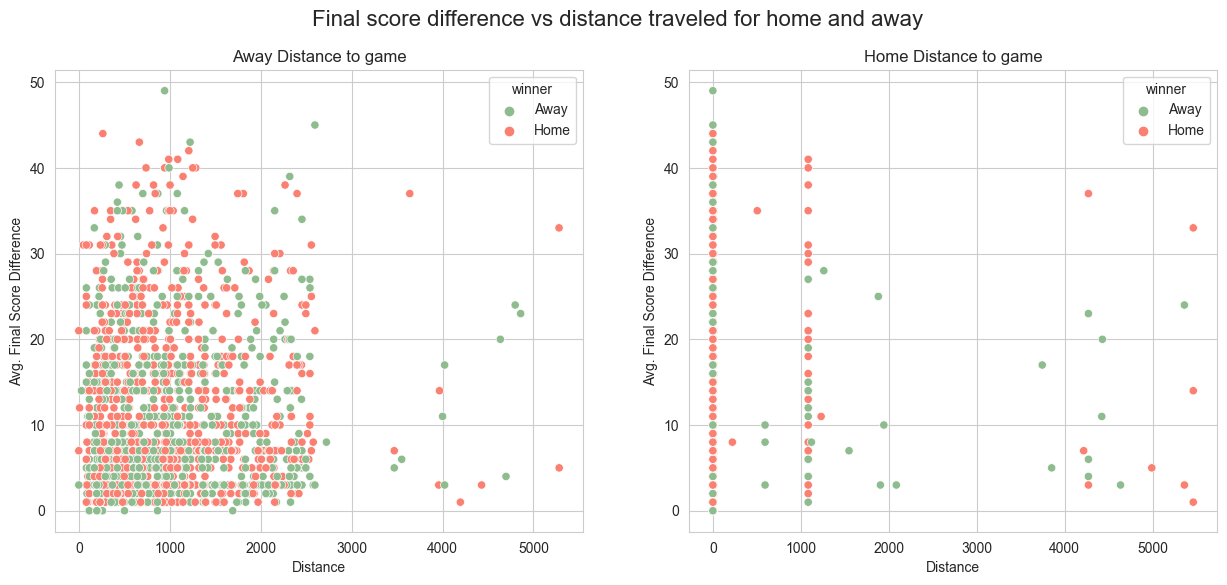

In [5]:
# Set the style for the plots
sns.set_style('whitegrid')

# Create a figure and axes
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,6))

# Set the overall title for the figure
fig.suptitle('Final score difference vs distance traveled for home and away', fontsize=16)

# Plot the first graph - Away Distance to game
scatter_away = sns.scatterplot(x='away_distance_to_game', y='final_score_diff', hue='winner', data=df, ax=ax[0], palette=['darkseagreen', 'salmon'])
ax[0].set_title('Away Distance to game')
ax[0].set_xlabel('Distance')
ax[0].set_ylabel('Avg. Final Score Difference')

# Plot the second graph - Home Distance to game
scatter_home = sns.scatterplot(x='home_distance_to_game', y='final_score_diff', hue='winner', data=df, ax=ax[1], palette=['darkseagreen', 'salmon'])
ax[1].set_title('Home Distance to game')
ax[1].set_xlabel('Distance')
ax[1].set_ylabel('Avg. Final Score Difference')

scatter_away.legend_.texts[0].set_text('Away')
scatter_away.legend_.texts[1].set_text('Home')

scatter_home.legend_.texts[0].set_text('Away')
scatter_home.legend_.texts[1].set_text('Home')


# Show the plot
plt.show()

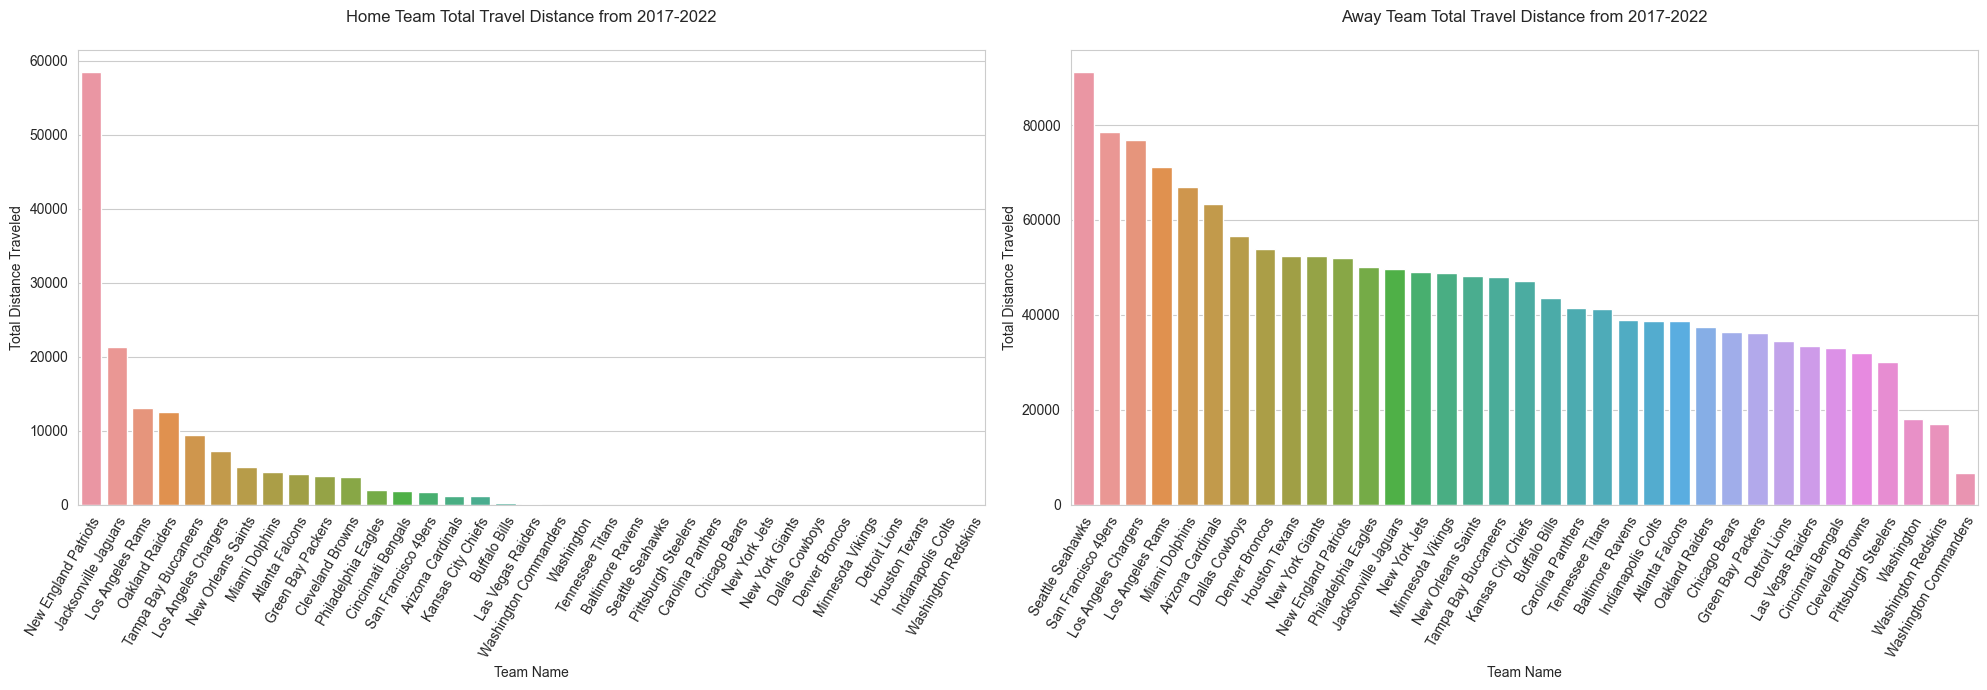

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(20,7))


home_distance_traveled = df.groupby('home_team_name')['home_distance_to_game'].sum().reset_index(drop=False).sort_values('home_distance_to_game', ascending=False).reset_index(drop=True)
s = sns.barplot(x=home_distance_traveled['home_team_name'], y=home_distance_traveled['home_distance_to_game'], ax=ax[0])

s.set_xticklabels(s.get_xticklabels(), rotation=60, ha='right', rotation_mode='anchor')
s.set_xlabel('Team Name')
s.set_ylabel('Total Distance Traveled')
s.set_title('Home Team Total Travel Distance from 2017-2022', pad=20)


away_distance_traveled = df.groupby('away_team_name')['away_distance_to_game'].sum().reset_index(drop=False).sort_values('away_distance_to_game', ascending=False).reset_index(drop=True)
p = sns.barplot(x=away_distance_traveled['away_team_name'], y=away_distance_traveled['away_distance_to_game'], ax=ax[1])

p.set_xticklabels(p.get_xticklabels(), rotation=60, ha='right', rotation_mode='anchor')
p.set_xlabel('Team Name')
p.set_ylabel('Total Distance Traveled')
p.set_title('Away Team Total Travel Distance from 2017-2022', pad=20)


plt.tight_layout()
plt.show()

plt.show()

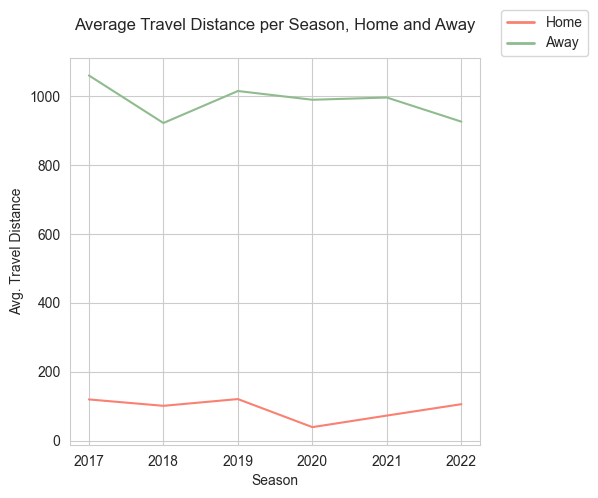

In [7]:
fig, ax = plt.subplots(figsize=(5,5))

home_dist = df.groupby('season')['home_distance_to_game'].mean().reset_index()
away_dist = df.groupby('season')['away_distance_to_game'].mean().reset_index()

sns.lineplot(x='season', y='home_distance_to_game', data=home_dist, color='salmon')
sns.lineplot(x='season', y='away_distance_to_game', data=away_dist, color='darkseagreen')

ax.set_xlabel('Season')
ax.set_ylabel('Avg. Travel Distance')
ax.set_title('Average Travel Distance per Season, Home and Away', pad=20)

# Create custom legend handles using proxy artists
handles = [plt.Line2D([0], [0], color='salmon', lw=2),
           plt.Line2D([0], [0], color='darkseagreen', lw=2)]
labels = ['Home', 'Away']
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

We can observe the scoring patterns for every team, both home and away, for the entire period from 2017 to 2022. Additionally, a count plot illustrates the total number of games played at each stadium.

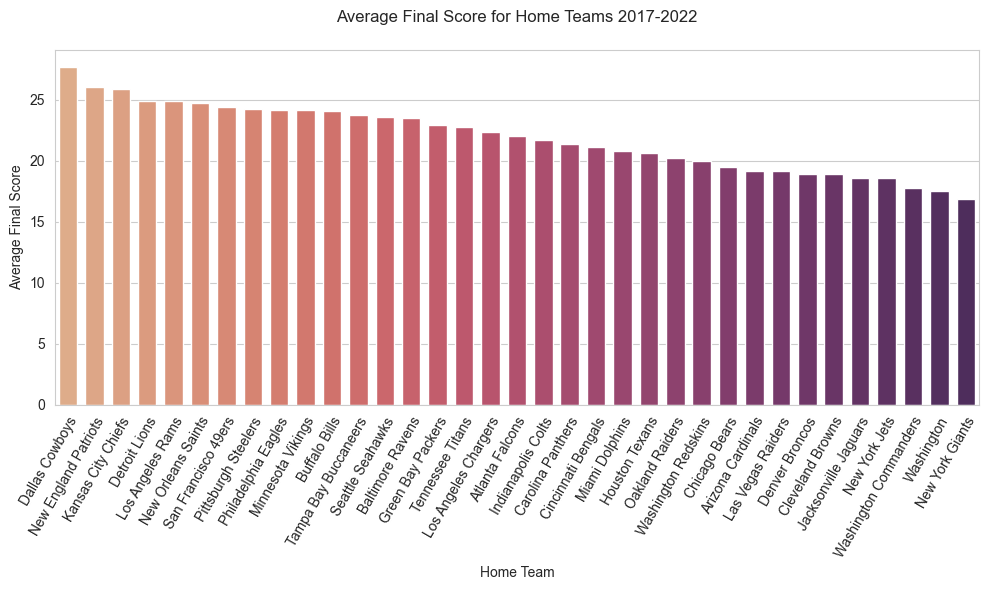

In [8]:
# Average score for the entire dataset for the home teams
home_score_avg = df.groupby('home_team_name')['home_final_score'].mean().to_frame().sort_values('home_final_score', ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style('whitegrid')
ax = sns.barplot(x='home_team_name', y='home_final_score', data=home_score_avg, width=0.7, palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', rotation_mode='anchor')
ax.set_xlabel('Home Team')
ax.set_ylabel('Average Final Score')
ax.set_title('Average Final Score for Home Teams 2017-2022', pad=20)
plt.tight_layout()
plt.show()

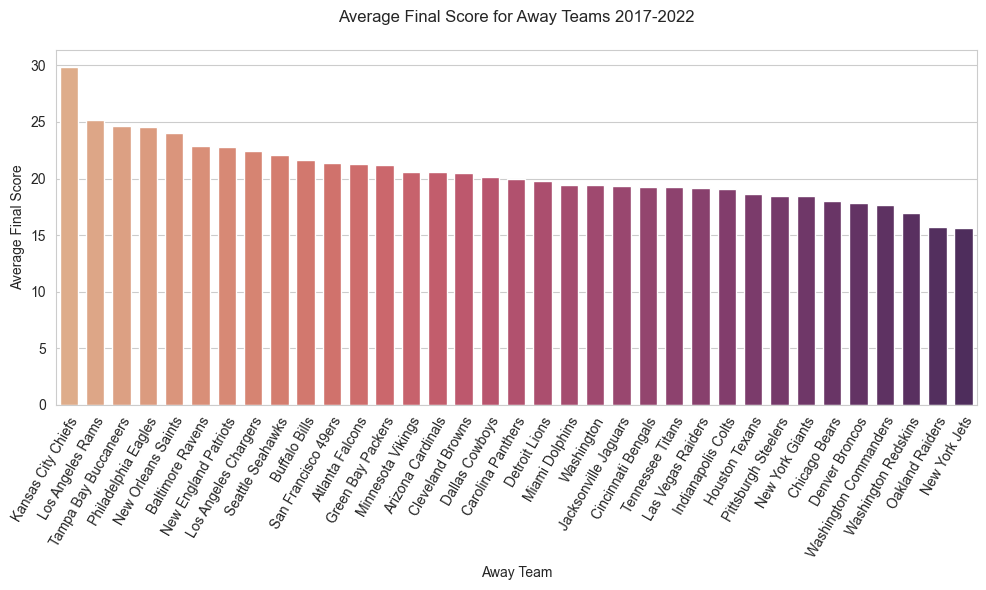

In [9]:
# Average score for the entire dataset for the away teams
away_score_avg = df.groupby('away_team_name')['away_final_score'].mean().to_frame().sort_values('away_final_score', ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style('whitegrid')
ax = sns.barplot(x='away_team_name', y='away_final_score', data=away_score_avg, width=0.7, palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', rotation_mode='anchor')
ax.set_xlabel('Away Team')
ax.set_ylabel('Average Final Score')
ax.set_title('Average Final Score for Away Teams 2017-2022', pad=20)
plt.tight_layout()
plt.show()

The Dallas Cowboys serve as an interesting case study. They have the highest average score for home games from 2017 to 2022, indicating strong performance when playing at their home stadium. However, for away games, their average score falls within the middle range, suggesting they might encounter more difficulty scoring when playing away from home. Another notable team is the Kansas City Chiefs, who consistently rank in the top 3 for both home and away games, highlighting their consistent performance regardless of the venue.

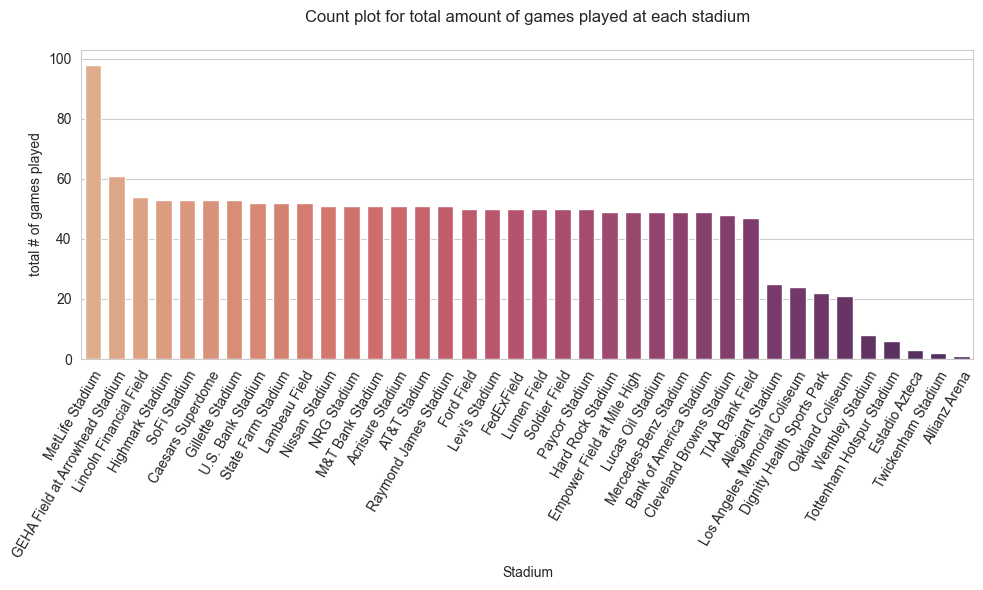

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

stadiums_sorted = df.value_counts('stadium_name').reset_index()
stadiums_sorted.columns = ['name', 'value']


ax = sns.barplot(x='name', y='value', data=stadiums_sorted, width=0.7, palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', rotation_mode='anchor')
ax.set_xlabel('Stadium')
ax.set_ylabel('total # of games played')
ax.set_title('Count plot for total amount of games played at each stadium', pad=20)
plt.tight_layout()
plt.show()

This would make sense, metLife Stadium is the home stadium for BOTH the New York Jets and the New York Giants

# Now lets look how covid might of effected the NFL

   season  stadium_attendance
0    2017        67473.528090
1    2018        67390.917603
2    2019        66757.445693
3    2020         4834.996283
4    2021        67490.680702
5    2022        69472.257042


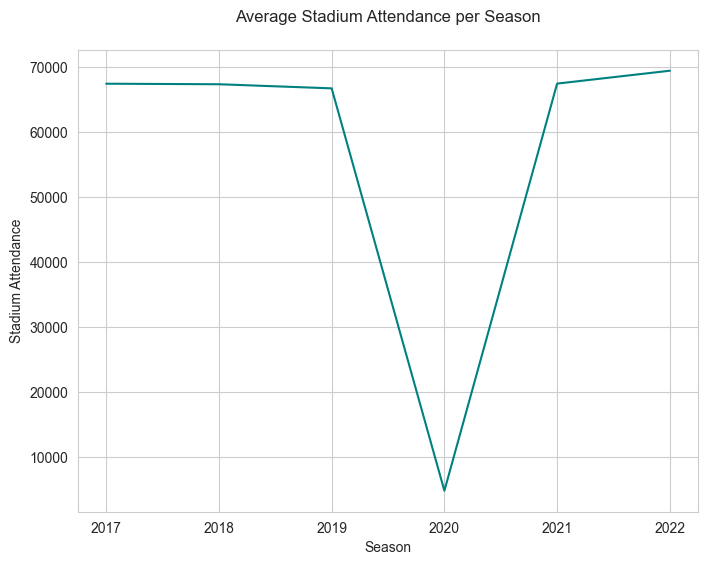

In [11]:
avgs = df.groupby('season')['stadium_attendance'].mean().to_frame().reset_index()
print(avgs)

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x='season', y='stadium_attendance', data=avgs, color='teal')
ax.set_xlabel('Season')
ax.set_ylabel('Stadium Attendance')
ax.set_title('Average Stadium Attendance per Season', pad=20)
plt.show()

We see a very large decrease in stadium attendance, and without a doubt this is due to covid regulations. 

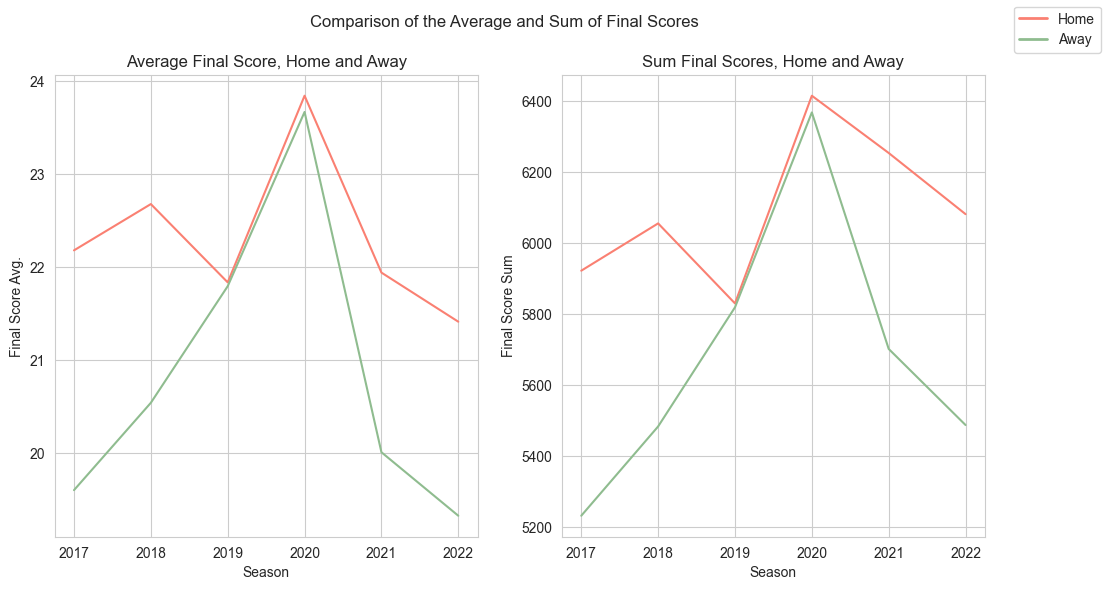

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))


# The average final score for away teams per year
away_average_score = df.groupby('season')['away_final_score'].mean().reset_index()

# The average final score for home teams per year
home_average_score = df.groupby('season')['home_final_score'].mean().reset_index()

home_line = sns.lineplot(x='season', y='home_final_score', data=home_average_score, color='salmon', ax=ax[0])
away_line = sns.lineplot(x='season', y='away_final_score', data=away_average_score, color='darkseagreen', ax=ax[0])
ax[0].set_title('Average Final Score, Home and Away')
ax[0].set_ylabel('Final Score Avg.')
ax[0].set_xlabel('Season')



# The sum of scores for each year, away
away_sum_scores = df.groupby('season')['away_final_score'].sum().reset_index()

# The sum of scores for each year, home
home_sum_scores = df.groupby('season')['home_final_score'].sum().reset_index()

sns.lineplot(x='season', y='home_final_score', data=home_sum_scores, color='salmon', ax=ax[1])
sns.lineplot(x='season', y='away_final_score', data=away_sum_scores, color='darkseagreen', ax=ax[1])
ax[1].set_title('Sum Final Scores, Home and Away')
ax[1].set_ylabel('Final Score Sum')
ax[1].set_xlabel('Season')


fig.suptitle('Comparison of the Average and Sum of Final Scores')

# Create custom legend handles using proxy artists
handles = [plt.Line2D([0], [0], color='salmon', lw=2),
           plt.Line2D([0], [0], color='darkseagreen', lw=2)]
labels = ['Home', 'Away']
fig.legend(handles, labels)

plt.show()

During this period, there is a relatively stable trend with minor fluctuations in scoring across the NFL. This indicates a level of consistency in scoring during those seasons.


In 2020, the year of COVID-19, there is a significant increase in both the average score and the total sum of scores. Several factors can explain this sudden rise:
- Limited or No Audience: Games were played without or with limited spectators due to social distancing measures. The absence of fans might have affected the game atmosphere and dynamics, potentially leading to changes in scoring patterns.
- Altered Training: The absence of a preseason likely resulted in fewer athlete injuries and players being better rested, potentially contributing to higher scoring.
- Health and Safety: Strict COVID-19 protocols may have disrupted team dynamics and impacted player availability. The absence of key players could lead to weaker defenses, resulting in higher scores.


Following the 2020 season, there is a significant decrease in scoring, indicating a regression to pre-COVID scoring patterns. This suggests that teams and players have adapted to the challenges posed by the pandemic, and strategies and gameplay have adjusted accordingly. The return of crowds and the normalization of game conditions likely contributed to the decrease in scoring.

In [13]:
import plotly.graph_objects as go

# Average score per quarter, away team
q1h = df.groupby('season')['home_Q1'].mean().reset_index()
q2h = df.groupby('season')['home_Q2'].mean().reset_index()
q3h = df.groupby('season')['home_Q3'].mean().reset_index()
q4h = df.groupby('season')['home_Q4'].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=q1h['season'], y=q1h['home_Q1'], name='Home Q1', line=dict(color='salmon')))
fig.add_trace(go.Scatter(x=q2h['season'], y=q2h['home_Q2'], name='Home Q2', line=dict(color='salmon')))
fig.add_trace(go.Scatter(x=q3h['season'], y=q3h['home_Q3'], name='Home Q3', line=dict(color='salmon')))
fig.add_trace(go.Scatter(x=q4h['season'], y=q4h['home_Q4'], name='Home Q4', line=dict(color='salmon')))

# Average score per quarter, home team
q1a = df.groupby('season')['away_Q1'].mean().reset_index()
q2a = df.groupby('season')['away_Q2'].mean().reset_index()
q3a = df.groupby('season')['away_Q3'].mean().reset_index()
q4a = df.groupby('season')['away_Q4'].mean().reset_index()

fig.add_trace(go.Scatter(x=q1a['season'], y=q1a['away_Q1'], name='Away Q1', line=dict(color='darkseagreen')))
fig.add_trace(go.Scatter(x=q2a['season'], y=q2a['away_Q2'], name='Away Q2', line=dict(color='darkseagreen')))
fig.add_trace(go.Scatter(x=q3a['season'], y=q3a['away_Q3'], name='Away Q3', line=dict(color='darkseagreen')))
fig.add_trace(go.Scatter(x=q4a['season'], y=q4a['away_Q4'], name='Away Q4', line=dict(color='darkseagreen')))

fig.update_layout(
    height = 800,
    title='Average Score per Quarter, Home and Away',
    xaxis_title='Season',
    yaxis_title='Average Score',
    legend=dict(
        title='Team',
        orientation='h',
        yanchor='bottom',
        y=-0.2,
        font=dict(
            size=12,
            color='black'
        ),
        itemsizing='constant'
    )
)

fig.show()

An interesting observation is that both home and away teams tend to have higher-scoring quarters in the 2nd and 4th quarters, while the 1st and 3rd quarters typically have lower-scoring drives. This pattern is consistent across teams and throughout the analyzed period.

The results before 2020 seem to be consistent with the results after covid, however we do see a slight increase from 2019 to 2020 for the scoring metric above.

In [14]:
fig = go.Figure()

q1 = df.groupby('season')['Q1_diff'].mean().reset_index()
q2 = df.groupby('season')['Q2_diff'].mean().reset_index()
q3 = df.groupby('season')['Q3_diff'].mean().reset_index()
q4 = df.groupby('season')['Q4_diff'].mean().reset_index()

fig.add_trace(go.Scatter(x=q1['season'], y=q1['Q1_diff'], name='Q1', line=dict(color='salmon')))
fig.add_trace(go.Scatter(x=q2['season'], y=q2['Q2_diff'], name='Q2', line=dict(color='black')))
fig.add_trace(go.Scatter(x=q3['season'], y=q3['Q3_diff'], name='Q3', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=q4['season'], y=q4['Q4_diff'], name='Q4', line=dict(color='green')))

fig.update_layout(
    height = 800,
    title='Average Difference Scores for every quarter, per season',
    xaxis_title='Season',
    yaxis_title='Average Score',
    legend=dict(
        title='Quarter',
        orientation='h',
        yanchor='bottom',
        y=-0.2,
        font=dict(
            size=12,
            color='black'
        ),
        itemsizing='constant'
    )
)

fig.show()


Nothing can really be expanded off what was said above; however, it is noticeable that the green line, quarter 4, decreased during covid. This could possibly be due to player's being more tired in the last quarter of the game, and covid was a sluggish, slow time. But we do see it increase again post-covid.

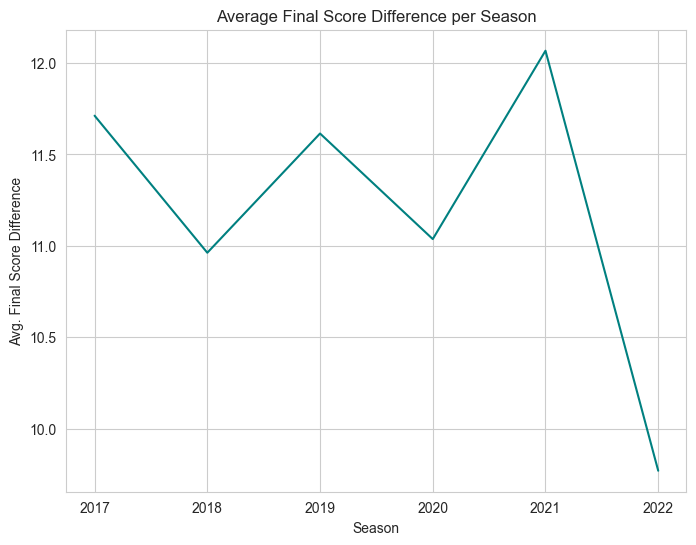

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
fin_diff = df.groupby('season')['final_score_diff'].mean().reset_index()
ax = sns.lineplot(x='season', y='final_score_diff', data=fin_diff, color='teal')
ax.set_xlabel('Season')
ax.set_ylabel('Avg. Final Score Difference')
ax.set_title('Average Final Score Difference per Season')

plt.show()

During the COVID-19 season, the score difference between winning and losing teams appears to be narrower compared to other seasons. However, in 2021, the score difference increases significantly, only to decrease again in 2022. This suggests that winning teams during the COVID-19 season adapted well, causing an increase in the score gap in 2021. However, in 2022, losing teams might have caught up with the adaptation post-covid, resulting in a reduced score gap between winning and losing teams.

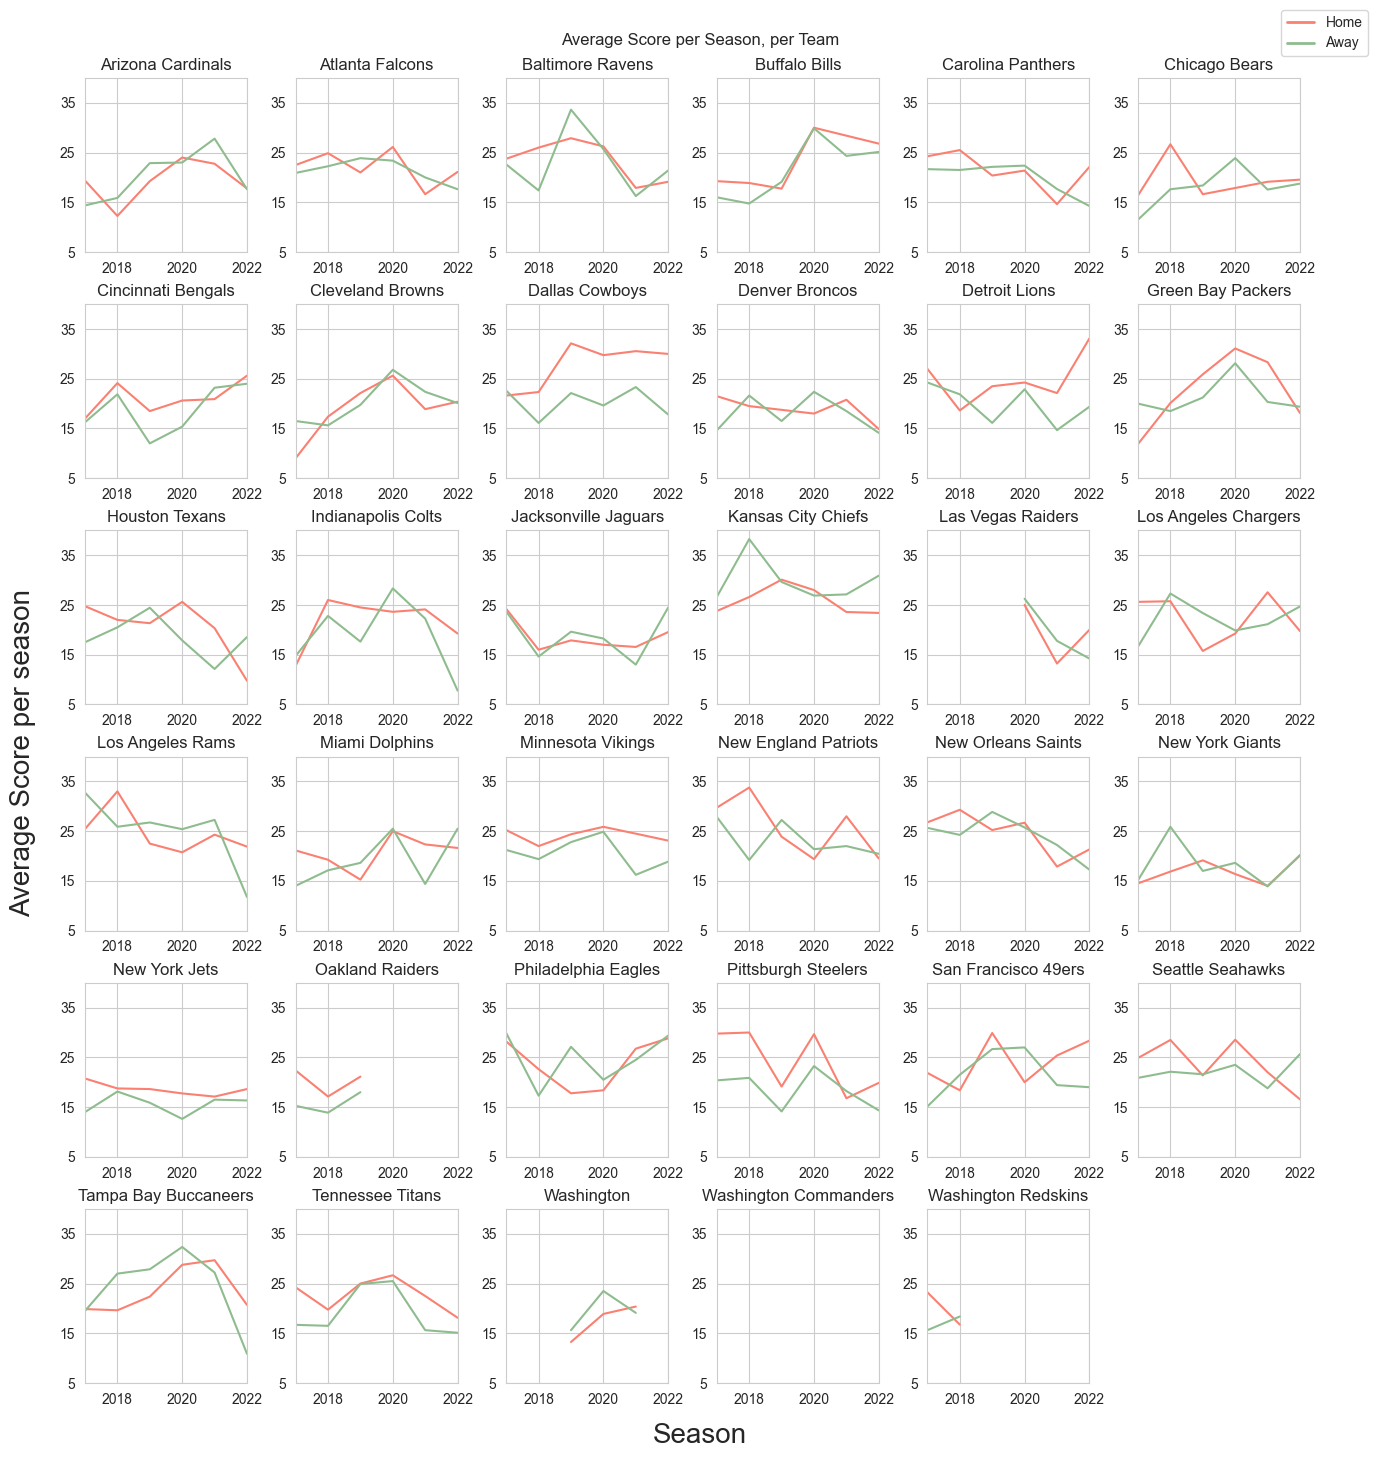

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

home_teams = df.groupby(['home_team_name', 'season'])['home_final_score'].mean().reset_index()
h = home_teams.home_team_name.unique()
custom_palette = sns.color_palette("Set2", len(home_teams['home_team_name'].unique()))

away_teams = df.groupby(['away_team_name', 'season'])['away_final_score'].mean().reset_index()
a = away_teams.away_team_name.unique()

team_idx = 0
fig, ax = plt.subplots(ncols=6, nrows=6, figsize=(15,15))

for row in range(6):
    for col in range(6):
        if team_idx < len(h):
            team = a[team_idx]
            team_a = away_teams[away_teams['away_team_name'] == team]
            team_h = home_teams[home_teams['home_team_name'] == team]

            sns.lineplot(x='season', y='home_final_score', data=team_h, ax=ax[row][col], color='salmon')
            sns.lineplot(x='season', y='away_final_score', data=team_a, ax=ax[row][col], color='darkseagreen')

            ax[row][col].set_title(f"{team}")
            ax[row][col].set_xlabel('')
            ax[row][col].set_ylabel('')
            ax[row][col].set_xlim(2017, 2022)
            ax[row][col].set_ylim(5, 40)
            ax[row][col].set_xticks(range(2018, 2023, 2))
            ax[row][col].set_yticks(range(5, 40, 10))

            team_idx += 1
        else:
            fig.delaxes(ax[row][col])

# Set overall x-axis and y-axis labels
fig.text(0.5, 0.04, 'Season', fontsize=20, ha='center')
fig.text(0.04, 0.5, 'Average Score per season', fontsize=20, va='center', rotation='vertical')

plt.suptitle('Average Score per Season, per Team')
plt.subplots_adjust(wspace=0.3, hspace=0.3, top=0.95, left=0.09, bottom=0.08)  # Adjust spacing between subplots and top margin

handles = [plt.Line2D([0], [0], color='salmon', lw=2),
           plt.Line2D([0], [0], color='darkseagreen', lw=2)]
labels = ['Home', 'Away']
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.95, 1))

plt.show()


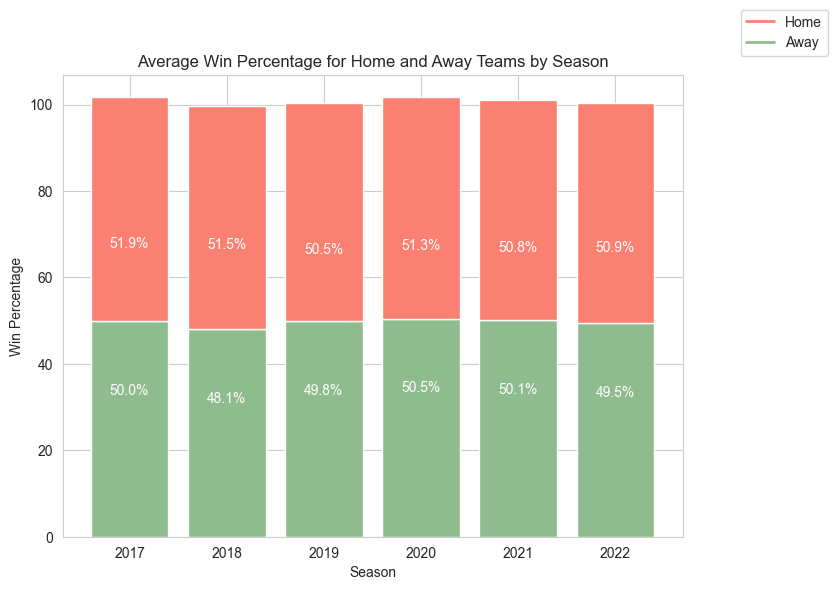

In [17]:

fig, ax = plt.subplots(figsize=(8,6))

away_win_perc = df.groupby('season')['away_team_win_perc'].mean().reset_index()
home_win_perc = df.groupby('season')['home_team_win_perc'].mean().reset_index()

ax.bar('season', 'away_team_win_perc', data=away_win_perc, color='darkseagreen')
ax.bar('season', 'home_team_win_perc', data=home_win_perc, bottom = away_win_perc['away_team_win_perc'], color='salmon')

# Adding the percentage values on top of each bar
for p1, p2 in zip(ax.patches[:len(away_win_perc)], ax.patches[len(away_win_perc):]):
    ax.annotate(f'{p1.get_height():.1f}%', (p1.get_x() + p1.get_width() / 2., p1.get_height()),
                ha='center', va='center', xytext=(0, -50), textcoords='offset points', color='white')
    ax.annotate(f'{p2.get_height():.1f}%', (p2.get_x() + p2.get_width() / 2., p2.get_height()),
                ha='center', va='center', xytext=(0, 50), textcoords='offset points', color='white')

# Setting the labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Win Percentage')
ax.set_title('Average Win Percentage for Home and Away Teams by Season')

handles = [plt.Line2D([0], [0], color='salmon', lw=2),
           plt.Line2D([0], [0], color='darkseagreen', lw=2)]
labels = ['Home', 'Away']
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.09, 1))

# Display the plot
plt.show()


The distribution of home wins and away wins exhibits a similar pattern, but the home teams consistently have a higher win percentage each year. This slight disparity suggests the presence of a possible home field advantage. Additionally, it is noteworthy that the away team win percentage in 2020 was the highest within the timeframe covered by this dataset.

# lets take a look at the top 5 performing home and away teams (performance metric is the average score over the years)

In [18]:
covid_only_data = df[df['season'] == 2020]


home_score_2020 = covid_only_data.groupby('home_team_name')['home_final_score'].mean().to_frame().sort_values('home_final_score', ascending=False).reset_index()
top5_home = home_score_2020.head(5)['home_team_name'].to_list()
bot5_home = home_score_2020.tail(5)['home_team_name'].to_list()

for e in bot5_home:
    top5_home.append(e)

away_score_2020 = covid_only_data.groupby('away_team_name')['away_final_score'].mean().to_frame().sort_values('away_final_score', ascending=False).reset_index()
top5_away = away_score_2020.head(5)['away_team_name'].to_list()
bot5_away = away_score_2020.tail(5)['away_team_name'].to_list()

for e in bot5_away:
    top5_away.append(e)

print(top5_away)
print(top5_home)


['Tampa Bay Buccaneers', 'Buffalo Bills', 'Indianapolis Colts', 'Green Bay Packers', 'San Francisco 49ers', 'New York Giants', 'Jacksonville Jaguars', 'Houston Texans', 'Cincinnati Bengals', 'New York Jets']
['Green Bay Packers', 'Buffalo Bills', 'Dallas Cowboys', 'Pittsburgh Steelers', 'Tampa Bay Buccaneers', 'Denver Broncos', 'Chicago Bears', 'New York Jets', 'Jacksonville Jaguars', 'New York Giants']


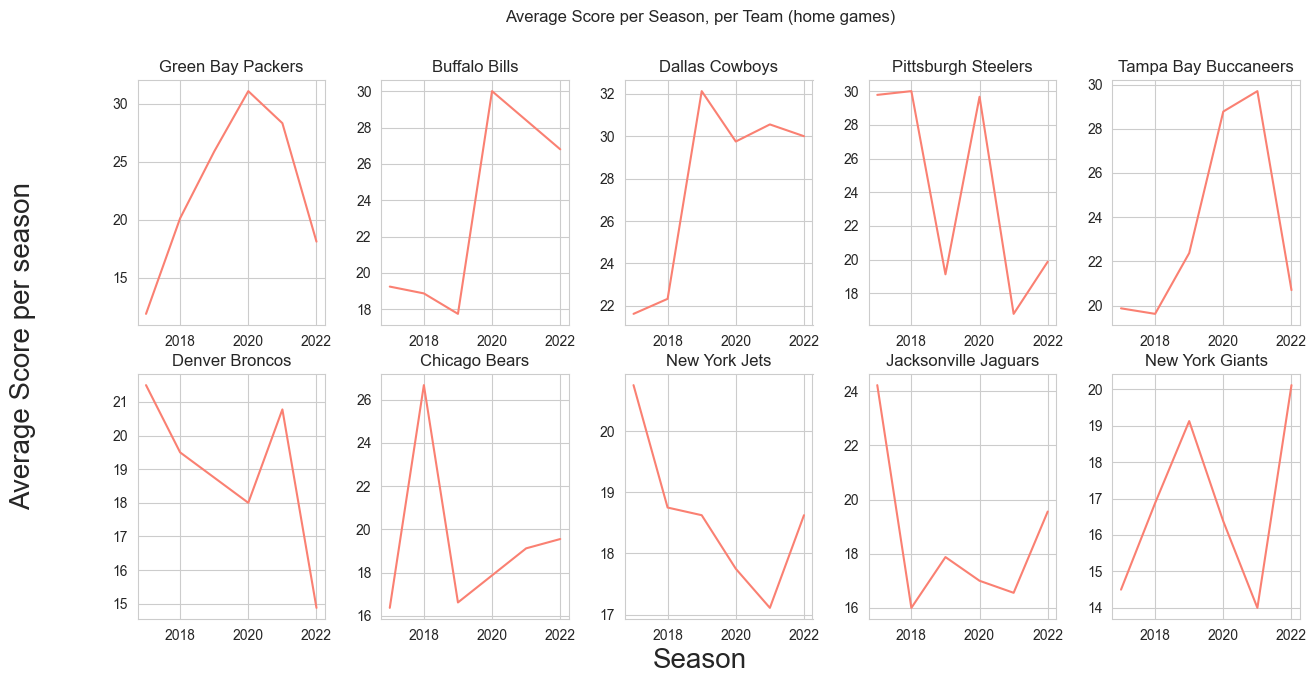

In [19]:
home_teams = df.groupby(['home_team_name', 'season'])['home_final_score'].mean().reset_index()

team_idx = 0
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15,7))

for row in range(2):
    for col in range(5):
        team = top5_home[team_idx]

        h = home_teams[home_teams['home_team_name'] == team]

        sns.lineplot(x='season', y='home_final_score', data=h, ax=ax[row][col], color='salmon')

        ax[row][col].set_title(f'{team}')
        ax[row][col].set_xlabel('')
        ax[row][col].set_ylabel('')

        team_idx += 1


# Set x-axis label for the entire figure
fig.text(0.5, 0.04, 'Season',fontsize=20, ha='center')

# Set y-axis label for the entire figure
fig.text(0.04, 0.5, 'Average Score per season',fontsize=20, va='center', rotation='vertical')
plt.suptitle('Average Score per Season, per Team (home games)')

plt.subplots_adjust(wspace=0.3)  # Adjust the spacing between subplots

plt.show()

#First row is the top 5 performing teams during Covid-19, and the bottom row is the bottom 5 performing teams during Covid-19

It is intriguing to observe that, with the exception of the Tampa Bay Buccaneers, all of the top 5 performing teams experienced a decline in performance following the 2020 COVID season. Conversely, there is a contrasting pattern where the worst performing teams in 2020 demonstrated an upward trend in their performance during 2021 and 2022. It is unfortunate to note that the Broncos displayed a remarkable performance in the year following COVID, only to become one of the lowest-scoring teams in 2022.

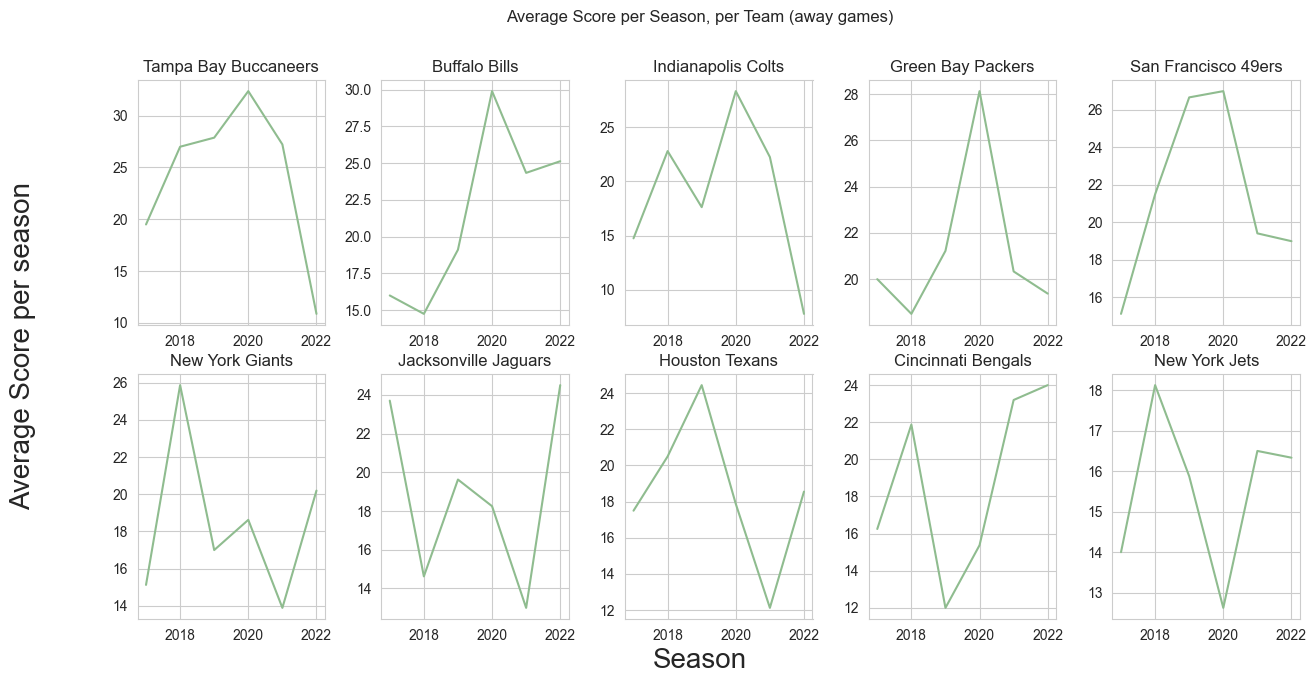

In [20]:
away_teams = df.groupby(['away_team_name', 'season'])['away_final_score'].mean().reset_index()


team_idx = 0
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 7))

for row in range(2):
    for col in range(5):
        team = top5_away[team_idx]

        a = away_teams[away_teams['away_team_name'] == team]

        sns.lineplot(x='season', y='away_final_score', data=a, ax=ax[row][col], color='darkseagreen')

        ax[row][col].set_title(f'{team}')
        ax[row][col].set_xlabel('')
        ax[row][col].set_ylabel('')

        team_idx += 1


# Set x-axis label for the entire figure
fig.text(0.5, 0.04, 'Season',fontsize=20, ha='center')

# Set y-axis label for the entire figure
fig.text(0.04, 0.5, 'Average Score per season',fontsize=20, va='center', rotation='vertical')
plt.suptitle('Average Score per Season, per Team (away games)')

plt.subplots_adjust(wspace=0.3)  # Adjust the spacing between subplots

plt.show()


#First row is the top 5 performing teams during Covid-19, and the bottom row is the bottom 5 performing teams during Covid-19

A similar pattern emerges in this analysis. The top 5 performing away teams during COVID experienced a decline in performance after COVID and continued to achieve lower scores in 2022. Conversely, the bottom 5 performing away teams during COVID showed improvement in their performance following the pandemic. Although the Giants, Jaguars, and Texans faced significant challenges in 2021, they exhibited a substantial increase in average score in 2022.

It is intriguing to observe that most of the top performing teams experienced a decrease in average score post-COVID, while the bottom performing teams demonstrated an increase. This provides insights into the ability of the top teams to adapt to a rapidly changing environment. However, when circumstances returned to normal, they faced difficulties in maintaining their performance.

# Conluding Thoughts

In conclusion, COVID-19 had a significant impact on the NFL, particularly in terms of scoring patterns and team performance. The absence or limited presence of fans, altered training routines, and health and safety protocols disrupted the dynamics of the game. While scoring increased during the pandemic, a regression to pre-COVID patterns was observed post-pandemic. The findings highlight the adaptability of teams to changing conditions and the challenges they face when returning to normal circumstances.